# Geometric Brownian Motion (GBM) Simulation Demo

This notebook demonstrates the simulation of asset price paths using Geometric Brownian Motion (GBM). GBM is a continuous-time stochastic process widely used in financial modeling, particularly for option pricing. The core idea is that the logarithm of the asset price follows a Brownian motion with drift.

The formula for simulating the asset price $S_t$ at discrete time steps is:

$S_{t+\Delta t} = S_t \exp((r - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} Z)$

Where:
- $S_t$: Asset price at time $t$
- $r$: Risk-free interest rate (annualized)
- $\sigma$: Volatility (annualized)
- $\Delta t$: Time step
- $Z$: A random sample from a standard normal distribution $N(0,1)$

We will use the `BarrierOptionsPricer` class (defined below) which contains a method for GBM path simulation.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Union, Optional # For type hinting in the class
import time # For the class, though not strictly needed for this demo's core simulation

# Set a seed for reproducibility of random numbers
np.random.seed(42)

## BarrierOptionsPricer Class Definition

The following cell contains the `BarrierOptionsPricer` class definition from the `barrier_options_pricer.py` file. We include the relevant part (`simulate_gbm_paths`) here to make the notebook self-contained and runnable. Other methods from the full class are omitted for brevity in this specific demo.


In [8]:
class BarrierOptionsPricer:
    """
    Monte Carlo pricer for barrier options using Geometric Brownian Motion.
    This version is simplified for the GBM simulation demo.
    """
    
    def __init__(self):
        """Initialize the pricer."""
        # In a full implementation, valid_option_types would be defined here
        pass
    
    def simulate_gbm_paths(self, S0: float, r: float, sigma: float, T: float, 
                          N_sim: int, N_steps: int) -> np.ndarray:
        """
        Simulate asset price paths using Geometric Brownian Motion.
        
        Parameters:
        -----------
        S0 : float
            Initial asset price
        r : float
            Risk-free interest rate (annualized)
        sigma : float
            Volatility (annualized)
        T : float
            Time to maturity (in years)
        N_sim : int
            Number of Monte Carlo paths
        N_steps : int
            Number of time steps for discretizing the path
        
        Returns:
        --------
        np.ndarray
            Array of shape (N_sim, N_steps + 1) containing all price paths
        """
        # Calculate time step
        dt = T / N_steps
        
        # Pre-calculate drift and diffusion terms for the risk-neutral GBM
        drift = (r - 0.5 * sigma**2) * dt
        diffusion = sigma * np.sqrt(dt)
        
        # Generate random numbers (standard normal) for all paths and time steps
        # Z ~ N(0,1)
        random_shocks = np.random.normal(0, 1, (N_sim, N_steps))
        
        # Initialize paths array
        paths = np.zeros((N_sim, N_steps + 1))
        paths[:, 0] = S0  # Set initial price for all paths
        
        # Generate paths iteratively
        # S_{t+dt} = S_t * exp( (r - 0.5*sigma^2)*dt + sigma*sqrt(dt)*Z )
        for i in range(N_steps):
            paths[:, i + 1] = paths[:, i] * np.exp(drift + diffusion * random_shocks[:, i])
        
        return paths
    
    # Placeholder for other methods that would be in the full class
    def apply_continuity_correction(self, B: float, sigma: float, T: float, 
                                  N_steps: int, option_type: str) -> float:
        # This method would adjust the barrier for continuous monitoring approximation.
        # For this demo, it's not directly used but kept for class structure consistency.
        # print("Continuity correction method called (placeholder).") # You can uncomment this for debugging
        return B 

    def calculate_barrier_payoff(self, path: np.ndarray, K: float, B: float, 
                               option_type: str, T: float, r_rate: float, # Renamed r to r_rate to avoid conflict
                               monitoring_type: str = 'discrete') -> float:
        # This method calculates the payoff for a barrier option.
        # Not used in this GBM demo, but part of the full pricer.
        # print("Calculate barrier payoff method called (placeholder).") # You can uncomment this for debugging
        return 0.0

    def monte_carlo_pricer(self, S0: float, K: float, B: float, T: float,
                          r_rate: float, sigma: float, option_type: str, # Renamed r to r_rate
                          N_sim: int, N_steps: int,
                          monitoring_type: str = 'discrete',
                          confidence_level: float = 0.95,
                          antithetic: bool = False) -> Tuple[float, float, float, dict]:
        # This is the main pricing engine.
        # Not used in this GBM demo, but part of the full pricer.
        # print("Monte Carlo pricer method called (placeholder).") # You can uncomment this for debugging
        return 0.0, 0.0, 0.0, {}


## Simulation Parameters

Let's define the parameters for our GBM simulation.


In [9]:
S0 = 100.0       # Initial asset price
r_rate = 0.05    # Risk-free rate (5% annualized) - renamed from 'r' to 'r_rate'
sigma = 0.2      # Volatility (20% annualized)
T_maturity = 1.0 # Time to maturity (1 year) - renamed from 'T' to 'T_maturity'
N_sim = 1000     # Number of simulation paths
N_steps = 252    # Number of time steps (e.g., daily steps for a year)

print(f"Initial Price (S0): ${S0}")
print(f"Risk-free Rate (r_rate): {r_rate*100:.2f}%") # Using r_rate
print(f"Volatility (sigma): {sigma*100:.2f}%")
print(f"Time to Maturity (T_maturity): {T_maturity} year(s)") # Using T_maturity
print(f"Number of Simulations (N_sim): {N_sim}")
print(f"Number of Time Steps (N_steps): {N_steps}")


Initial Price (S0): $100.0
Risk-free Rate (r_rate): 5.00%
Volatility (sigma): 20.00%
Time to Maturity (T_maturity): 1.0 year(s)
Number of Simulations (N_sim): 1000
Number of Time Steps (N_steps): 252


## Running the Simulation

Now, we'll instantiate our pricer and use its `simulate_gbm_paths` method.


In [10]:
# Instantiate the pricer
pricer_demo = BarrierOptionsPricer()

# Simulate the GBM paths
# Using the renamed variables for clarity
simulated_paths = pricer_demo.simulate_gbm_paths(S0, r_rate, sigma, T_maturity, N_sim, N_steps)

print(f"Shape of simulated_paths array: {simulated_paths.shape}")
print(f"(Should be: ({N_sim}, {N_steps + 1}))")


Shape of simulated_paths array: (1000, 253)
(Should be: (1000, 253))


## Visualizing Simulated Paths

Let's plot a few of the simulated paths to see what they look like.


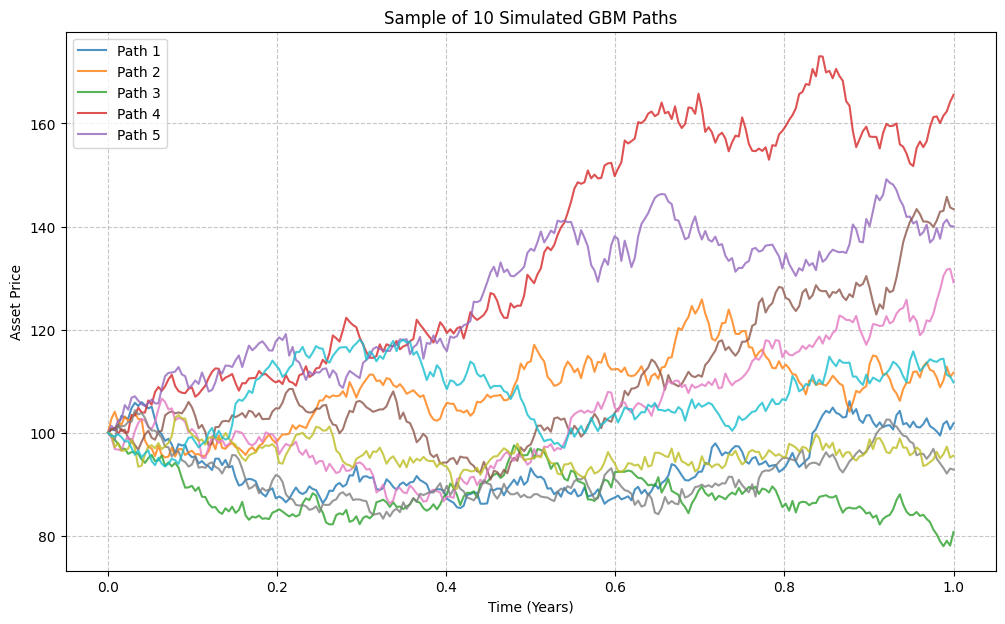

In [11]:
plt.figure(figsize=(12, 7))

# Define time points for the x-axis
# Using T_maturity
time_points = np.linspace(0, T_maturity, N_steps + 1)

# Plot the first few paths (e.g., 10 paths)
num_paths_to_plot = 10
for i in range(min(N_sim, num_paths_to_plot)):
    plt.plot(time_points, simulated_paths[i, :], lw=1.5, alpha=0.8, label=f'Path {i+1}' if i < 5 else None) # Label first 5

plt.title(f'Sample of {num_paths_to_plot} Simulated GBM Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True, linestyle='--', alpha=0.7)
if num_paths_to_plot <= 10: # Add legend if not too cluttered
    plt.legend()
plt.show()


## Distribution of Final Asset Prices

A key result of GBM is that the asset price at a future time T, $S_T$, is log-normally distributed. Let's look at the histogram of the final prices from our simulation.


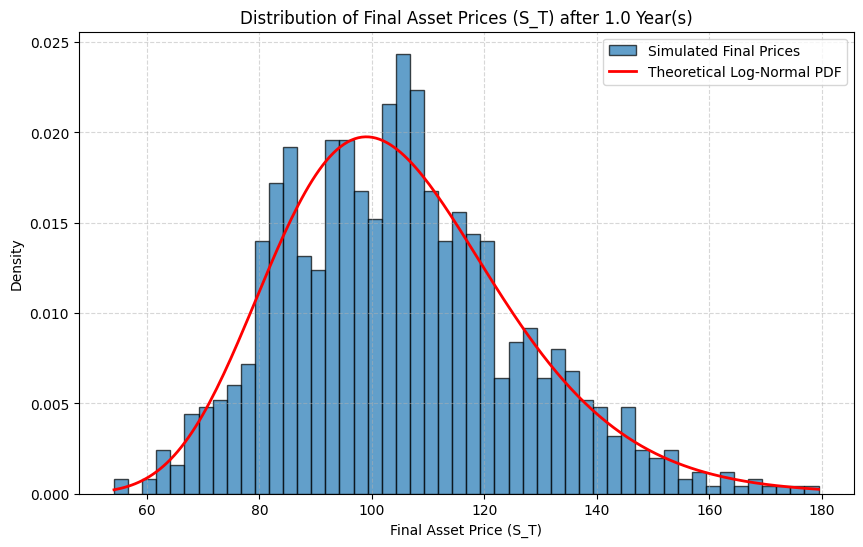

Mean of simulated final prices: $105.09
Expected final price (theoretical, S0*exp(r*T)): $105.13


In [12]:
final_prices = simulated_paths[:, -1] # Get the last price of each path

plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, edgecolor='black', alpha=0.7, density=True, label='Simulated Final Prices')

# Theoretical log-normal distribution parameters
# Using r_rate and T_maturity
log_S0 = np.log(S0)
mean_log_ST = log_S0 + (r_rate - 0.5 * sigma**2) * T_maturity
std_log_ST = sigma * np.sqrt(T_maturity)

# Overlay theoretical log-normal PDF (optional, for comparison)
# Requires scipy.stats.lognorm
try:
    from scipy.stats import lognorm
    x_vals = np.linspace(min(final_prices), max(final_prices), 200)
    pdf_theoretical = lognorm.pdf(x_vals, s=std_log_ST, scale=np.exp(mean_log_ST))
    plt.plot(x_vals, pdf_theoretical, 'r-', lw=2, label='Theoretical Log-Normal PDF')
except ImportError:
    print("scipy.stats.lognorm not found. Skipping theoretical PDF overlay.")


plt.title(f'Distribution of Final Asset Prices (S_T) after {T_maturity} Year(s)')
plt.xlabel('Final Asset Price (S_T)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Mean of simulated final prices: ${np.mean(final_prices):.2f}")
# Using r_rate and T_maturity
print(f"Expected final price (theoretical, S0*exp(r*T)): ${S0 * np.exp(r_rate * T_maturity):.2f}")


## Conclusion

This notebook demonstrated the simulation of asset price paths using Geometric Brownian Motion. We observed typical path behavior and confirmed that the distribution of final asset prices aligns with log-normal expectations. This GBM simulation is a fundamental building block for Monte Carlo option pricing, including the pricing of barrier options.
